In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import mysql.connector
from mysql.connector import Error
import warnings; 
warnings.simplefilter('ignore')
import pandas as pd

stop_words = stopwords.words("english")

# Database connection

In [20]:
corpus = []
try:
    host = 'corover-new-db.mysql.database.azure.com'
    user = 'corovernewdb@corover-new-db'
    port = 3306
    password ='Admin@2019'
    database = 'read_chat_store'
    conn = mysql.connector.connect(host= host, user= user, password= password, database= database)

    if conn.is_connected():
        print("You're connected to database")

        cur = conn.cursor()
        cur.execute("""
        select query
        from read_chat_store.chatbot_query_details
        where app_id = '7cb9605c-692b-11ea-bc55-0242ac130003'
        and day(created_ts) = 5
        and month(created_ts) = 4
        and year(created_ts) = 2020
        and algorithm = 'NO-MATCH'
        and language_code = 'en';
        """)

        record = cur.fetchall()
        for line in record:
            corpus.append(line[0])
        
except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if (conn.is_connected()):
        cur.close()
        conn.close()
        print("MySQL connection is closed")

You're connected to database
MySQL connection is closed


In [21]:
def NGram(corpus, n):
    
    cv = CountVectorizer(ngram_range=(n,n), stop_words=stop_words)
    
    bow = cv.fit_transform(corpus)

    wordFreq = [(word,bow.sum(axis=0)[0,idx]) for word, idx in cv.vocabulary_.items()]

    wordFreq = sorted(wordFreq, key=lambda x:x[1], reverse=True)
    
    return wordFreq

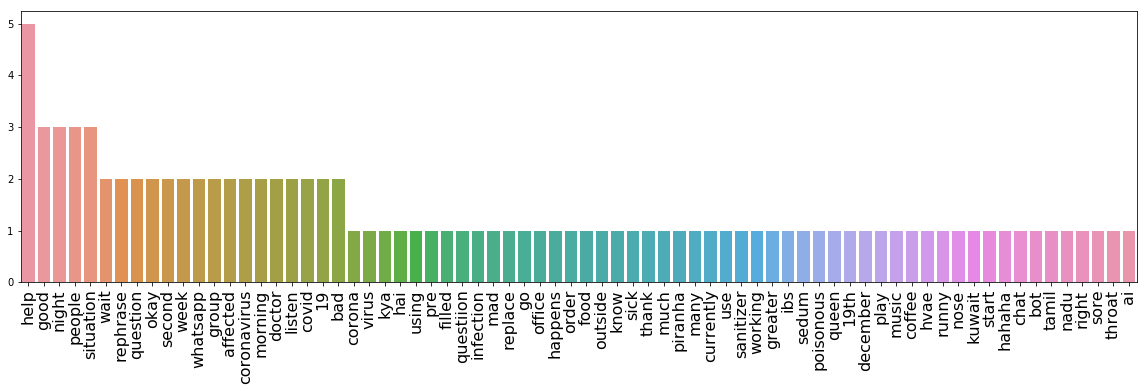

In [38]:
unigrams = NGram(corpus, 1)

x = [w[0] for w in unigrams]
y = [w[1] for w in unigrams]

fig = plt.figure(figsize=(10,10))
sns.barplot(x, y)
plt.xticks(rotation=90, fontsize=16)
plt.show()

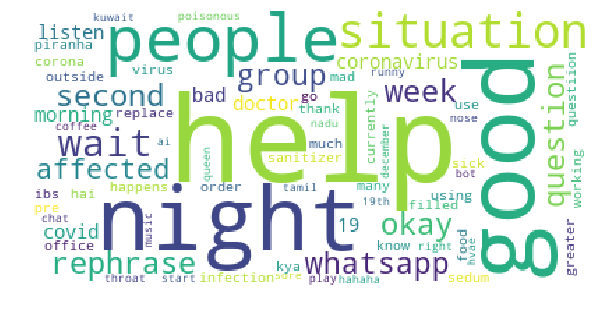

In [50]:
wordcloud = WordCloud(background_color="white")

wordcloud.generate_from_frequencies({w[0]:w[1] for w in unigrams})

fig = plt.figure(figsize=(20, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


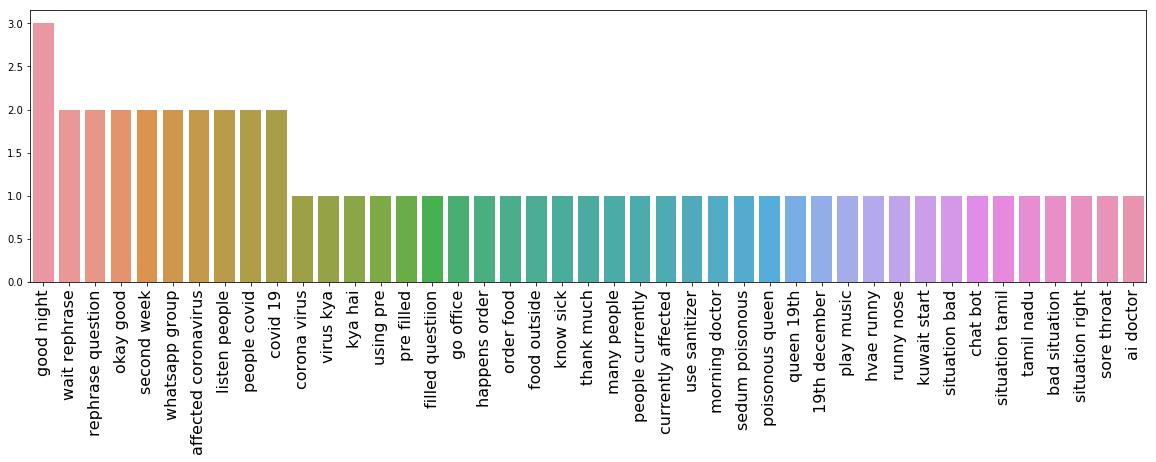

In [25]:
bigrams = NGram(corpus, 2)

x = [w[0] for w in bigrams]
y = [w[1] for w in bigrams]

fig = plt.figure(figsize=(20, 5))
sns.barplot(x, y)
plt.xticks(rotation=90, fontsize=16)
plt.show()

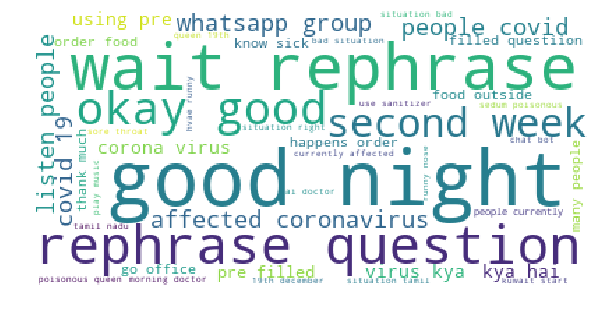

In [49]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies({w[0]:w[1] for w in bigrams})

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

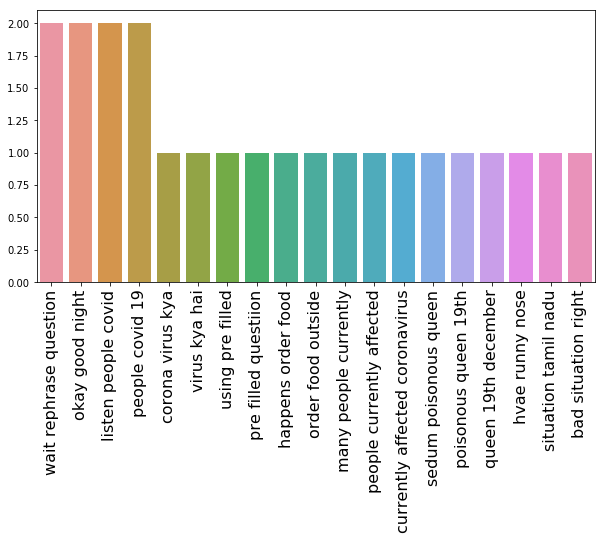

In [52]:
trigrams = NGram(corpus, 3)

x = [w[0] for w in trigrams]
y = [w[1] for w in trigrams]

fig = plt.figure(figsize=(10, 5))
sns.barplot(x, y)
plt.xticks(rotation=90, fontsize=16)
plt.show()

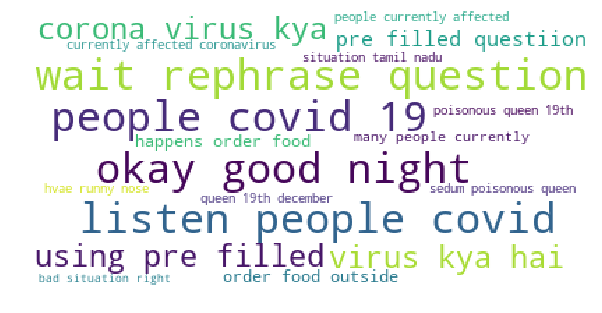

In [53]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies({w[0]:w[1] for w in trigrams})

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()